# HS Matriculation

This simple set of code sets up a dataframe that will later be incorporated into a larger dataframe that is used to train a retention model. *Retention*, according to the Student Clearning House, is defined as Fall to Fall reenrollment. In other words, the students who were enrolled in the previous Fall semester and are now enrolled in the current Fall semester are considered to be "retained." The proportion of those previous Fall students who are enrolled in current Fall are the official metrics we are tracking. This data for matriculated HS students will be added to a model that predicts students most likely to not retain from Fall to Fall. This workflow will also be used to clean new data so that it is properly set up to feed into the trained model and output predictions. 

In [1]:
import pandas as pd
import numpy as np

import os
from pathlib import Path

from preprocess import fetch_and_combine_csv_files, add_hs_matriculation

import warnings
warnings.filterwarnings('ignore')

# Store data path
DATA_PATH = Path.cwd()/'Data'

# File name to save file
OUTPUT_DIR = "Files"
SAVED_FILE_NAME = 'High School Matriculation.csv'


In [2]:
# Import data
hs_enrollment = fetch_and_combine_csv_files(DATA_PATH)

# Add matriculation column. Records binary "From HS", "Not From HS".
hs_enrollment = add_hs_matriculation(hs_enrollment)

### High School Dataframe

*termcode* (int): Six digit integer term code. <br>
*appnum* (int): Integer designating the number of times a student has applied <br>
*bannerid* (string): Student banner ID, not the PIDM.<br>
*lastname* (string): Lastname of student<br>
*firstname* (string): Firstname of student.<br>
*mi* (string): Middle name of student.<br>
*gender* (string): Again unnecessary for what I'm doing here.<br>
*ethndesc* (string): Description of ethnicitity. Again, redundant. Will use this instead of ethnic code.<br>
*lgcydesc* (string): Description of legacy code. I will use this one. The other is redundant.<br> 
*statusdesc* (string): Designates if a decision has been made on application.<br>
*admtdesc* (string): Designates how student applied (i.e. web admit, standard admit).<br>
*stypcode* (string): Single alphabetical character denoting student type.<br>
*resdcode* (string): Single alphabetical character denoting residency type.<br>
*majrdesc1* (string): Full name of declared major.<br>

### Save File

In [3]:
# Create path to save file
output_file = os.path.join(OUTPUT_DIR, SAVED_FILE_NAME)

# Check to see if path exists. If it does, overwrite anyway
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Save file
hs_enrollment.to_csv(output_file, index=False)

### View Matriculation

In [4]:
# View breakdown of students that have matriculated right out of HS for each Fall term
matriculation_tbl = (pd.DataFrame(hs_enrollment.groupby(['term', 'hs_matriculation'])['id'].count())
                       .reset_index()
                       .rename(columns = {'id':'cnt'})
                       .pivot_table(index = 'term', columns = 'hs_matriculation', values = 'cnt')
                    )

matriculation_tbl

hs_matriculation,From HS,Not From HS
term,,
201980,1265.0,6665.0
202080,1257.0,5976.0
202180,1150.0,5905.0
202280,986.0,5770.0
202380,945.0,5711.0


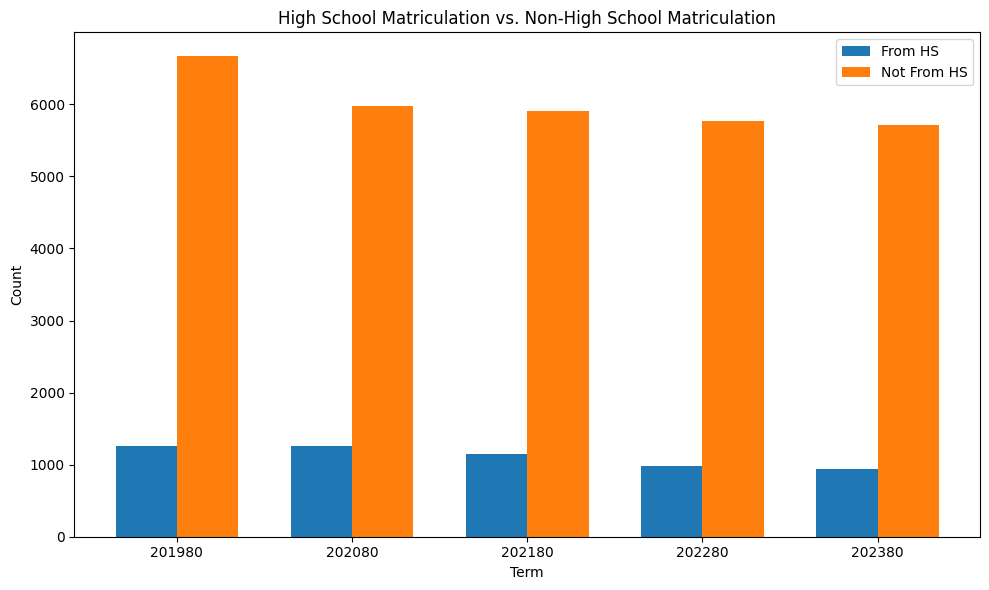

In [5]:
import matplotlib.pyplot as plt

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bar positions
bar_width = 0.35
index = range(len(matriculation_tbl.index))

# Plot bars
ax.bar(index, matriculation_tbl['From HS'], bar_width, label='From HS')
ax.bar([i + bar_width for i in index], matriculation_tbl['Not From HS'], bar_width, label='Not From HS')

# Create titles and axis labels
ax.set_xlabel('Term')
ax.set_ylabel('Count')
ax.set_title('High School Matriculation vs. Non-High School Matriculation')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(matriculation_tbl.index)
ax.legend()

# Show chart
plt.tight_layout()
plt.show()


In [ ]:
#hs_enrollment[hs_enrollment['hs_matriculation'] == 'From HS']